Q1. Adding hidden layer

In [14]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
#adding extra input layer
encoded2=Dense(encoding_dim, activation='relu')(encoded)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded2)
#adding an extra decode layer
decoded2 = Dense(784, activation='sigmoid')(decoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded2)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=40,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/40
235/235 [==============================] - 10s 38ms/step - loss: 0.7254 - val_loss: 0.7226
Epoch 2/40
235/235 [==============================] - 9s 39ms/step - loss: 0.7197 - val_loss: 0.7170
Epoch 3/40
235/235 [==============================] - 8s 33ms/step - loss: 0.7141 - val_loss: 0.7115
Epoch 4/40
235/235 [==============================] - 9s 36ms/step - loss: 0.7087 - val_loss: 0.7062
Epoch 5/40
235/235 [==============================] - 9s 37ms/step - loss: 0.7035 - val_loss: 0.7010
Epoch 6/40
235/235 [==============================] - 8s 33ms/step - loss: 0.6983 - val_loss: 0.6959
Epoch 7/40
235/235 [==============================] - 11s 45ms/step - loss: 0.6934 - val_loss: 0.6910
Epoch 8/40
235/235 [==============================] - 9s 38ms/step - loss: 0.6885 - val_loss: 0.6863
Epoch 9/40
235/235 [==============================] - 7s 32ms/step - loss: 0.6838 - val_loss: 0.6816
Epoch 10/40
235/235 [=====

Q2. Do the prediction on the test data and then visualize one of the reconstructed version of that test data.
Also, visualize the same test data before reconstruction using Matplotlib.



Epoch 1/15
235/235 [==============================] - 6s 20ms/step - loss: 0.3772 - val_loss: 0.3170 - lr: 0.0010
Epoch 2/15
235/235 [==============================] - 4s 16ms/step - loss: 0.3134 - val_loss: 0.3035 - lr: 0.0010
Epoch 3/15
235/235 [==============================] - 3s 15ms/step - loss: 0.3046 - val_loss: 0.2980 - lr: 0.0010
Epoch 4/15
235/235 [==============================] - 4s 15ms/step - loss: 0.3002 - val_loss: 0.2941 - lr: 0.0010
Epoch 5/15
235/235 [==============================] - 5s 19ms/step - loss: 0.2972 - val_loss: 0.2913 - lr: 0.0010
Epoch 6/15
235/235 [==============================] - 3s 15ms/step - loss: 0.2949 - val_loss: 0.2895 - lr: 0.0010
Epoch 7/15
235/235 [==============================] - 3s 15ms/step - loss: 0.2933 - val_loss: 0.2877 - lr: 0.0010
Epoch 8/15
235/235 [==============================] - 5s 20ms/step - loss: 0.2921 - val_loss: 0.2868 - lr: 0.0010
Epoch 9/15
235/235 [==============================] - 3s 15ms/step - loss: 0.2910 - val_

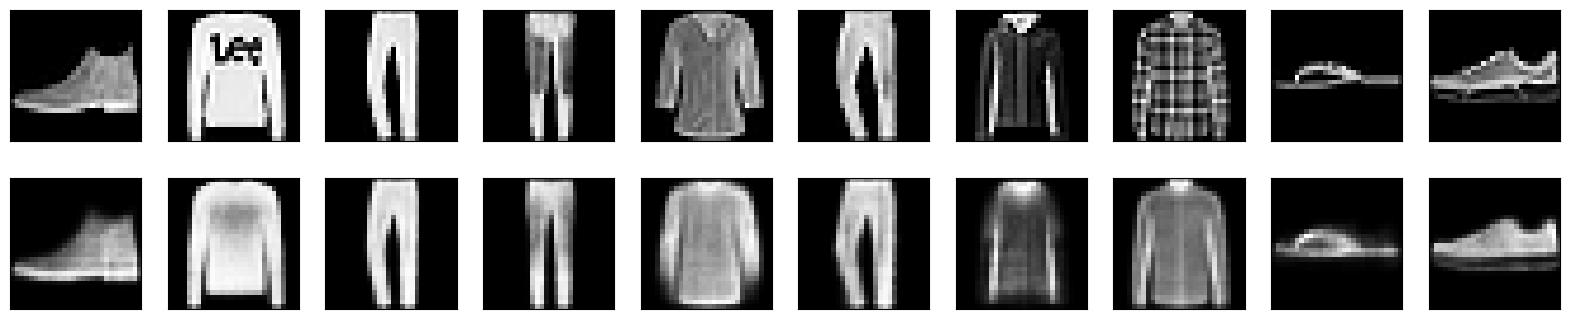

In [15]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# ... (Data loading and preparation remains the same)

# Enhanced model architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)  # More units
encoded = Dropout(0.2)(encoded)                      # Dropout for regularization
encoded = Dense(64, activation='relu')(encoded)
hidden_layer = Dense(128, activation='relu')(encoded)  # Deeper architecture
decoded = Dense(784, activation='sigmoid')(hidden_layer)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Callbacks for improved training
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Training with callbacks
autoencoder.fit(x_train, x_train,
                epochs=15,                  # Increased epochs for deeper model
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[early_stopping, lr_scheduler])

# Predict on the test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize the original and reconstructed data
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Q3. Repeat the question 2 on the denoisening autoencoder

Epoch 1/20
235/235 [==============================] - 4s 13ms/step - loss: 0.4204 - val_loss: 0.3457 - lr: 0.0010
Epoch 2/20
235/235 [==============================] - 4s 18ms/step - loss: 0.3440 - val_loss: 0.3305 - lr: 0.0010
Epoch 3/20
235/235 [==============================] - 4s 17ms/step - loss: 0.3336 - val_loss: 0.3237 - lr: 0.0010
Epoch 4/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3285 - val_loss: 0.3198 - lr: 0.0010
Epoch 5/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3251 - val_loss: 0.3169 - lr: 0.0010
Epoch 6/20
235/235 [==============================] - 5s 21ms/step - loss: 0.3229 - val_loss: 0.3147 - lr: 0.0010
Epoch 7/20
235/235 [==============================] - 3s 14ms/step - loss: 0.3210 - val_loss: 0.3129 - lr: 0.0010
Epoch 8/20
235/235 [==============================] - 3s 12ms/step - loss: 0.3197 - val_loss: 0.3118 - lr: 0.0010
Epoch 9/20
235/235 [==============================] - 3s 13ms/step - loss: 0.3184 - val_

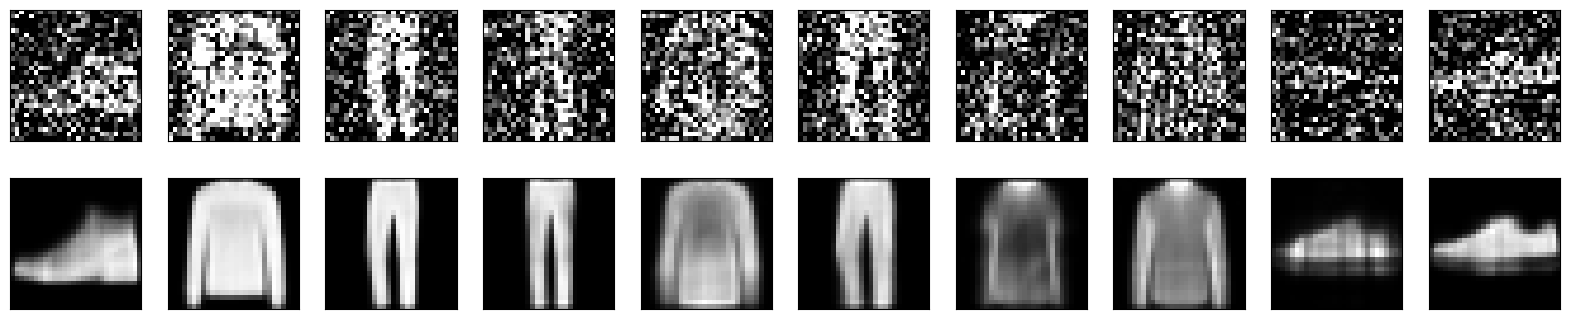

In [14]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt


# Model architecture with regularization
encoding_dim = 64  # Increased encoding dimension for better representation
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dropout(0.2)(encoded)  # Add dropout for regularization
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)

# Noise introduction
noise_factor = 0.5 # You can adjust this for more/less noise
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the model
autoencoder.fit(x_train_noisy, x_train,  # Train on noisy input, target is clean
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[early_stopping, lr_scheduler])

# Predict on the noisy test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize the noisy input and the reconstructed data
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display noisy input
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Q4. plot loss and accuracy using the history object

Epoch 1/10
235/235 [==============================] - 2s 7ms/step - loss: 0.6080 - accuracy: 0.7929 - val_loss: 0.4903 - val_accuracy: 0.8259
Epoch 2/10
235/235 [==============================] - 2s 7ms/step - loss: 0.4244 - accuracy: 0.8530 - val_loss: 0.4453 - val_accuracy: 0.8440
Epoch 3/10
235/235 [==============================] - 2s 6ms/step - loss: 0.3869 - accuracy: 0.8642 - val_loss: 0.4069 - val_accuracy: 0.8581
Epoch 4/10
235/235 [==============================] - 2s 7ms/step - loss: 0.3600 - accuracy: 0.8737 - val_loss: 0.3985 - val_accuracy: 0.8625
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.3370 - accuracy: 0.8818 - val_loss: 0.3755 - val_accuracy: 0.8680
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.3215 - accuracy: 0.8857 - val_loss: 0.3659 - val_accuracy: 0.8702
Epoch 7/10
235/235 [==============================] - 4s 16ms/step - loss: 0.3087 - accuracy: 0.8900 - val_loss: 0.3612 - val_accuracy: 0.8699
Epoch

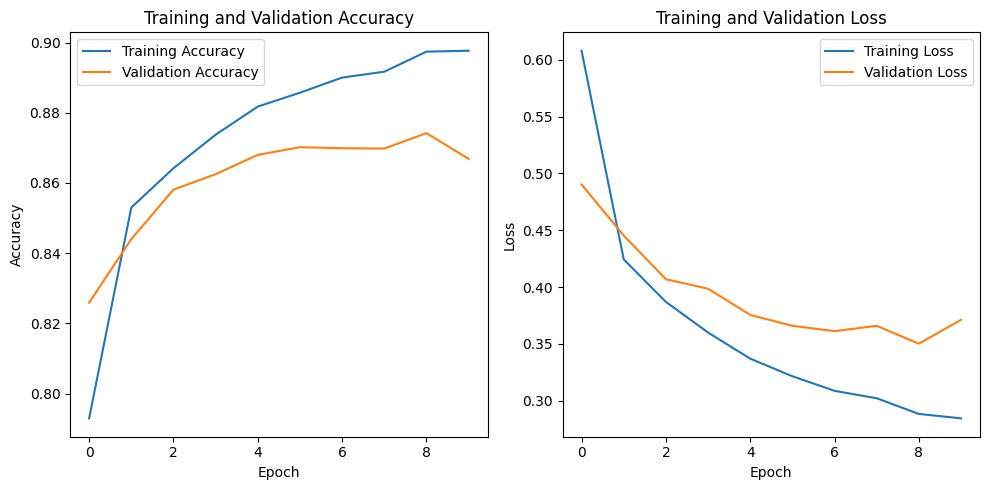

In [15]:

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import Adam

# Load and prepare the Fashion MNIST data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# Convert labels to one-hot encoding
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
# Model architecture
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(10, activation='softmax')(encoded)  # Classification layer

model = Model(input_img, decoded)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, y_test))
# Plotting the training and validation loss
plt.figure(figsize=(10, 5))

# Plotting training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()